In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd

In [ ]:
# Install folium and mapclassify so the explore method of a GeoDataFrame can work properly.
! pip install folium
! pip install mapclassify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Geospatial Data for Census Tracts

In [ ]:
# Download the shapefile of New York State census tracts from the following website:
# https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2020&layergroup=Census+Tracts
# The default file name is tl_2020_48_tract.zip
# This file needs to be manually uploaded to this Colab environment.

In [ ]:
zip_file_path = '/content/drive/MyDrive/tl_2020_37_tract.zip'
census_tracts = gpd.read_file( 'zip://' + zip_file_path)
print(census_tracts.shape)
census_tracts.head()

(2672, 13)


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,37,141,920300,37141920300,9203,Census Tract 9203,G5020,S,236115472,605423,+34.6713171,-078.0020072,"POLYGON ((-78.15648 34.67909, -78.15458 34.680..."
1,37,141,990100,37141990100,9901,Census Tract 9901,G5020,S,0,133298393,+34.3492469,-077.6031267,"POLYGON ((-77.71433 34.29117, -77.71406 34.291..."
2,37,071,031600,37071031600,316,Census Tract 316,G5020,S,22744042,66304,+35.2681382,-081.2849294,"POLYGON ((-81.32560 35.26363, -81.32556 35.263..."
3,37,071,031800,37071031800,318,Census Tract 318,G5020,S,6071060,8149,+35.2623339,-081.2292201,"POLYGON ((-81.25719 35.26613, -81.25585 35.266..."
4,37,155,961801,37155961801,9618.01,Census Tract 9618.01,G5020,S,103973789,0,+34.6244596,-079.2476138,"POLYGON ((-79.31012 34.59978, -79.31002 34.599..."


<Axes: >

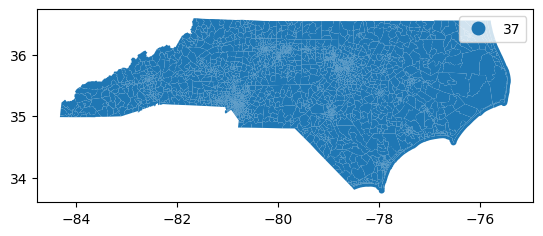

In [ ]:
census_tracts.plot("STATEFP", legend=True)

## Load Precinct-Level Voting Data for the 2020 Presidential Election

In [ ]:
# Download the New York State voting data from this link:
# https://dataverse.harvard.edu/file.xhtml?fileId=5259468&version=40.0#
# Download the shapefile as a ZIP archive.
# The downloaded file is named tx_2020.zip.
# Manually upload the zip file to this colab environment.

In [ ]:
zip_path = '/content/drive/MyDrive/nc_2020.zip'
precincts = gpd.read_file('zip://'+ zip_path)
print(precincts.shape)
precincts.head()

(2662, 53)


,PREC_ID,ENR_DESC,COUNTY_NAM,COUNTY_ID,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20PREOWRI,...,G20SACDSHI,G20SACRGOR,G20SACDCUB,G20SACRDIL,G20SACDSTY,G20SACRCAR,G20SACDYOU,G20SACRGRI,G20SACDBRO,geometry
0,01,PATTERSON,ALAMANCE,1,2299,566,27,6,5,4,...,566,2276,571,2296,548,2280,567,2274,568,"POLYGON ((1839239.963 762333.301, 1839240.297 ..."
1,02,COBLE,ALAMANCE,1,2387,559,15,4,4,3,...,558,2347,562,2367,534,2349,555,2359,543,"POLYGON ((1840088.847 807206.254, 1840090.437 ..."
2,07,ALBRIGHT,ALAMANCE,1,1996,581,20,9,1,4,...,578,1945,596,1977,570,1963,579,1954,585,"POLYGON ((1871943.040 801230.531, 1871943.510 ..."
3,H08,H08,GUILFORD,41,73,614,3,1,2,2,...,607,76,612,74,614,77,602,76,602,"POLYGON ((1702354.926 805008.445, 1702627.359 ..."
4,079,079,MECKLENBURG,60,469,1223,8,9,2,6,...,1212,452,1227,465,1209,454,1224,456,1220,"POLYGON ((1410451.445 548338.307, 1410462.273 ..."


In [ ]:
# Calculate the percentage of votes that goes to Biden.
# Only votes to Biden or Trump are counted.
precincts['Biden_proportion'] = precincts['G20PREDBID'] / (precincts['G20PREDBID'] + precincts['G20PRERTRU'])

In [ ]:
precincts.head()

,PREC_ID,ENR_DESC,COUNTY_NAM,COUNTY_ID,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20PREOWRI,...,G20SACRGOR,G20SACDCUB,G20SACRDIL,G20SACDSTY,G20SACRCAR,G20SACDYOU,G20SACRGRI,G20SACDBRO,geometry,Biden_proportion
0,01,PATTERSON,ALAMANCE,1,2299,566,27,6,5,4,...,2276,571,2296,548,2280,567,2274,568,"POLYGON ((1839239.963 762333.301, 1839240.297 ...",0.197557
1,02,COBLE,ALAMANCE,1,2387,559,15,4,4,3,...,2347,562,2367,534,2349,555,2359,543,"POLYGON ((1840088.847 807206.254, 1840090.437 ...",0.189749
2,07,ALBRIGHT,ALAMANCE,1,1996,581,20,9,1,4,...,1945,596,1977,570,1963,579,1954,585,"POLYGON ((1871943.040 801230.531, 1871943.510 ...",0.225456
3,H08,H08,GUILFORD,41,73,614,3,1,2,2,...,76,612,74,614,77,602,76,602,"POLYGON ((1702354.926 805008.445, 1702627.359 ...",0.893741
4,079,079,MECKLENBURG,60,469,1223,8,9,2,6,...,452,1227,465,1209,454,1224,456,1220,"POLYGON ((1410451.445 548338.307, 1410462.273 ...",0.722813


In [ ]:
# For unknown reason, colab cannot display these voting precincts. Perhaps there are too many precincts?
#precincts.explore("Biden_proportion", legend=False)

## Approximate Census Blocks by Voting Precincts

Here is my approximation strategy:
- For a given census block, find all precincts whose centroid (computed by geopands) is contained by the census block.
- Use these precincts as an approximation to the census block.

In [ ]:
# Align the coordinates of these two geo data frames.
census_tracts.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [ ]:
precincts.crs

<Projected CRS: EPSG:2264>
Name: NAD83 / North Carolina (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - North Carolina - counties of Alamance; Alexander; Alleghany; Anson; Ashe; Avery; Beaufort; Bertie; Bladen; Brunswick; Buncombe; Burke; Cabarrus; Caldwell; Camden; Carteret; Caswell; Catawba; Chatham; Cherokee; Chowan; Clay; Cleveland; Columbus; Craven; Cumberland; Currituck; Dare; Davidson; Davie; Duplin; Durham; Edgecombe; Forsyth; Franklin; Gaston; Gates; Graham; Granville; Greene; Guilford; Halifax; Harnett; Haywood; Henderson; Hertford; Hoke; Hyde; Iredell; Jackson; Johnston; Jones; Lee; Lenoir; Lincoln; Macon; Madison; Martin; McDowell; Mecklenburg; Mitchell; Montgomery; Moore; Nash; New Hanover; Northampton; Onslow; Orange; Pamlico; Pasquotank; Pender; Perquimans; Person; Pitt; Polk; Randolph; Richmond; Robeson; Rockingham; Rowan; Rutherford; Sampson; Scotland; Stanly; Stokes; Sur

In [ ]:
precincts = precincts.to_crs(4269)

**Modify the variable `CENSUS_BLOCK_INDEX` to examine a different block.**

In [ ]:
CENSUS_TRACT_INDEX = 123 # The row index of a census tract  in data frame census_tracts
census_tracts.loc[CENSUS_TRACT_INDEX]

STATEFP                                                    37
COUNTYFP                                                  047
TRACTCE                                                930900
GEOID                                             37047930900
NAME                                                     9309
NAMELSAD                                    Census Tract 9309
MTFCC                                                   G5020
FUNCSTAT                                                    S
ALAND                                                36619348
AWATER                                                 212584
INTPTLAT                                          +34.3159737
INTPTLON                                         -078.7391773
geometry    POLYGON ((-78.801309 34.30993, -78.80130799999...
Name: 123, dtype: object

Finding Intersecting Precincts and Calculating Their Overlap

In [ ]:
census_tract_polygon = census_tracts.loc[CENSUS_TRACT_INDEX, 'geometry']
overlap_precincts = precincts[precincts['geometry'].intersects(census_tract_polygon)]
overlap_precincts['overlap_percentage'] = None  # Create an empty 'overlap_percentage' column

# Calculate and assign overlap percentages for each row
for idx, precinct_row in overlap_precincts.iterrows():
    precinct_geometry = precinct_row['geometry']

    # Calculate the intersection area
    intersection_area = precinct_geometry.intersection(census_tract_polygon).area

    # Calculate the percentage overlap
    overlap_percentage = (intersection_area / precinct_geometry.area) * 100

    # Assign the calculated overlap_percentage to the corresponding row
    overlap_precincts.at[idx, 'overlap_percentage'] = overlap_percentage

overlap_precincts.head()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,PREC_ID,ENR_DESC,COUNTY_NAM,COUNTY_ID,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20PREOWRI,...,G20SACDCUB,G20SACRDIL,G20SACDSTY,G20SACRCAR,G20SACDYOU,G20SACRGRI,G20SACDBRO,geometry,Biden_proportion,overlap_percentage
1198,P01A,BOGUE,COLUMBUS,24,750,431,3,2,3,1,...,417,703,434,698,443,703,435,"POLYGON ((-78.67908 34.29944, -78.67885 34.299...",0.364945,0.015795
1224,P07,CHADBOURN,COLUMBUS,24,1137,1040,7,2,0,2,...,982,1079,1038,1056,1048,1050,1047,"POLYGON ((-78.90118 34.31251, -78.90100 34.312...",0.477722,4.205252
1264,P23,WEST WHITEVILLE,COLUMBUS,24,893,638,8,0,1,1,...,577,855,638,864,627,850,638,"POLYGON ((-78.80004 34.37462, -78.80002 34.374...",0.416721,33.705667
1265,P22A,SOUTH WHITEVILLE,COLUMBUS,24,1036,442,5,0,1,0,...,429,971,452,969,449,958,460,"POLYGON ((-78.79520 34.25265, -78.79519 34.252...",0.299053,6.65957
2470,P19,WHITEVILLE 1,COLUMBUS,24,867,836,10,1,2,0,...,752,824,820,815,838,812,838,"POLYGON ((-78.72866 34.33987, -78.72850 34.339...",0.490898,45.009434


In [ ]:

overlap_precincts.tail()

,PREC_ID,ENR_DESC,COUNTY_NAM,COUNTY_ID,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20PREOWRI,...,G20SACDCUB,G20SACRDIL,G20SACDSTY,G20SACRCAR,G20SACDYOU,G20SACRGRI,G20SACDBRO,geometry,Biden_proportion,overlap_percentage
1224,P07,CHADBOURN,COLUMBUS,24,1137,1040,7,2,0,2,...,982,1079,1038,1056,1048,1050,1047,"POLYGON ((-78.90118 34.31251, -78.90100 34.312...",0.477722,4.205252
1264,P23,WEST WHITEVILLE,COLUMBUS,24,893,638,8,0,1,1,...,577,855,638,864,627,850,638,"POLYGON ((-78.80004 34.37462, -78.80002 34.374...",0.416721,33.705667
1265,P22A,SOUTH WHITEVILLE,COLUMBUS,24,1036,442,5,0,1,0,...,429,971,452,969,449,958,460,"POLYGON ((-78.79520 34.25265, -78.79519 34.252...",0.299053,6.65957
2470,P19,WHITEVILLE 1,COLUMBUS,24,867,836,10,1,2,0,...,752,824,820,815,838,812,838,"POLYGON ((-78.72866 34.33987, -78.72850 34.339...",0.490898,45.009434
2472,P20A,WHITEVILLE 2,COLUMBUS,24,214,332,4,2,2,0,...,308,212,326,219,320,214,324,"POLYGON ((-78.72732 34.29433, -78.72725 34.294...",0.608059,68.014699


In [ ]:
# Filter precincts with overlap_percentage >= 50
filtered_precincts = overlap_precincts[overlap_precincts['overlap_percentage'] >= 50]

# Now, filtered_precincts contains only the precincts with overlap_percentage >= 50
filtered_precincts.head()

,PREC_ID,ENR_DESC,COUNTY_NAM,COUNTY_ID,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20PREOWRI,...,G20SACDCUB,G20SACRDIL,G20SACDSTY,G20SACRCAR,G20SACDYOU,G20SACRGRI,G20SACDBRO,geometry,Biden_proportion,overlap_percentage
2472,P20A,WHITEVILLE 2,COLUMBUS,24,214,332,4,2,2,0,...,308,212,326,219,320,214,324,"POLYGON ((-78.72732 34.29433, -78.72725 34.294...",0.608059,68.014699


In [ ]:
# Visualize this census tract and the precincts that are approximating it.

In [ ]:
census_tracts.loc[[CENSUS_TRACT_INDEX]].explore('STATEFP')

In [ ]:
filtered_precincts.explore('Biden_proportion')

In [ ]:
# Import the library
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


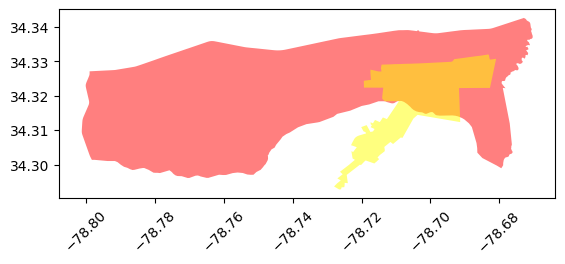

In [ ]:
# Show the approximation error
base = census_tracts.loc[[CENSUS_TRACT_INDEX]].plot('STATEFP', color='red', alpha=0.5)
filtered_precincts.plot('STATEFP', color='yellow', ax=base, alpha=0.5)
# Set aspect ratio to be equal for x and y axes
plt.gca().set_aspect('equal', adjustable='box')

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()


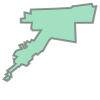

In [ ]:
# Measure the approximation error in area.
approximation = filtered_precincts.unary_union
approximation

In [ ]:
approximation_one_block = gpd.GeoSeries([approximation], crs=4269)
approximation_one_block

0    POLYGON ((-78.72732 34.29433, -78.72725 34.294...
dtype: geometry

In [ ]:
census_tract = census_tracts.loc[[CENSUS_TRACT_INDEX], 'geometry'].reset_index()

In [ ]:
error = approximation_one_block.symmetric_difference(census_tract)

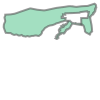

In [ ]:
error.loc[0]

In [ ]:
error.area

<ipython-input-81-a4029d802f14>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  error.area


0    0.003389
dtype: float64

In [ ]:
relative_error = error.area /census_tract.area
relative_error

<ipython-input-82-4a4c7555a961>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  relative_error = error.area /census_tract.area


0    0.939476
dtype: float64

In [ ]:
for i in census_tracts.index:
  census_block_polygon = census_tracts.loc[i, 'geometry']
  overlap_precincts = precincts[precincts['geometry'].intersects(census_block_polygon)]
  overlap_precincts['overlap_percentage'] = None
  for idx, precinct_row in overlap_precincts.iterrows():
    precinct_geometry = precinct_row['geometry']

    # Calculate the intersection area
    intersection_area = precinct_geometry.intersection(census_block_polygon).area

    # Calculate the percentage overlap
    overlap_percentage = (intersection_area / precinct_geometry.area) * 100

    # Assign the calculated overlap_percentage to the corresponding row
    overlap_precincts.loc[idx, 'overlap_percentage'] = overlap_percentage
    filtered_precincts = overlap_precincts[overlap_precincts['overlap_percentage'] >= 50]

  # Show the approximation error
  approximation = filtered_precincts.unary_union
  approximation_one_block = gpd.GeoSeries([approximation], crs=4269)
  census_tract = census_tracts.loc[[i], 'geometry'].reset_index()
  error = approximation_one_block.symmetric_difference(census_tract)
  relative_error = error.area /census_tract.area
  census_tracts.loc[i,'relative_error'] = relative_error.iloc[0]

census_tracts

Streaming output truncated to the last 5000 lines.
  super().__setitem__(key, value)
<ipython-input-83-7022638fa03f>:23: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  relative_error = error.area /census_tract.area
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
<ipython-input-83-7022638fa03f>:23: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  relative_error = error.area /census_

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,relative_error
0,37,141,920300,37141920300,9203,Census Tract 9203,G5020,S,236115472,605423,+34.6713171,-078.0020072,"POLYGON ((-78.15648 34.67909, -78.15458 34.680...",0.295671
1,37,141,990100,37141990100,9901,Census Tract 9901,G5020,S,0,133298393,+34.3492469,-077.6031267,"POLYGON ((-77.71433 34.29117, -77.71406 34.291...",0.753245
2,37,071,031600,37071031600,316,Census Tract 316,G5020,S,22744042,66304,+35.2681382,-081.2849294,"POLYGON ((-81.32560 35.26363, -81.32556 35.263...",0.435602
3,37,071,031800,37071031800,318,Census Tract 318,G5020,S,6071060,8149,+35.2623339,-081.2292201,"POLYGON ((-81.25719 35.26613, -81.25585 35.266...",0.226595
4,37,155,961801,37155961801,9618.01,Census Tract 9618.01,G5020,S,103973789,0,+34.6244596,-079.2476138,"POLYGON ((-79.31012 34.59978, -79.31002 34.599...",0.599181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,37,119,001504,37119001504,15.04,Census Tract 15.04,G5020,S,3519177,10623,+35.2440467,-080.7584093,"POLYGON ((-80.78122 35.24749, -80.78120 35.247...",0.519598
2668,37,119,001505,37119001505,15.05,Census Tract 15.05,G5020,S,5239455,16974,+35.2743691,-080.7565551,"POLYGON ((-80.76909 35.26604, -80.76889 35.266...",0.047032
2669,37,119,001603,37119001603,16.03,Census Tract 16.03,G5020,S,2487106,15427,+35.2327298,-080.7705875,"POLYGON ((-80.77565 35.23679, -80.77547 35.236...",0.518280
2670,37,057,061903,37057061903,619.03,Census Tract 619.03,G5020,S,32520125,38446,+35.7914698,-080.0930999,"POLYGON ((-80.14902 35.79641, -80.14753 35.797...",0.564844


In [ ]:
csv_file_path = 'Overlapping_north.csv'

# Use the to_csv method to save the DataFrame as a CSV file
census_tracts.to_csv(csv_file_path, index= True)
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to Overlapping_ma.csv


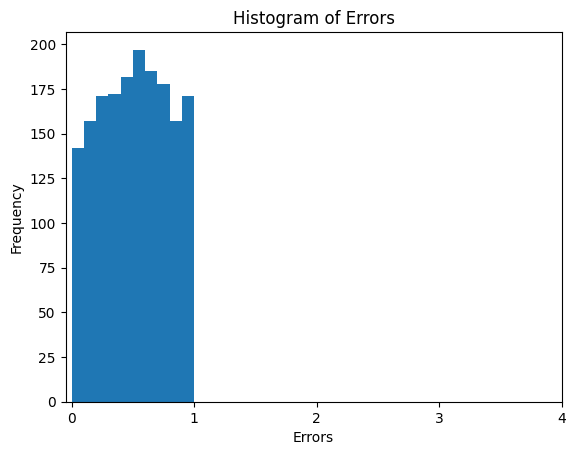

In [ ]:
import matplotlib.pyplot as plt


plt.hist(census_tracts['relative_error'])

# Add labels and a title
plt.xticks(np.arange(0, 5))
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
#plt.savefig('overlapping_ma.png')

# Show the plot
plt.show()

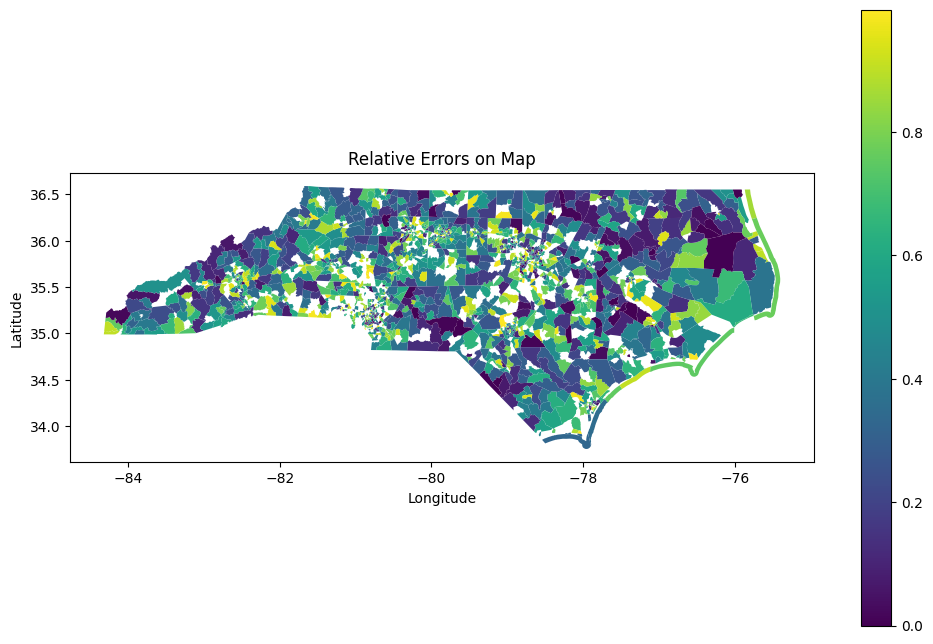

In [ ]:
# Create a base map using census_blocks
base_map = census_tracts.plot(column='relative_error',  legend=True, figsize=(12, 8))

# Customize the plot (add title, labels, etc.)

plt.title('Relative Errors on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('overlapping_map_ma.png')
# Show the plot
plt.show()

In [ ]:
results = pd.DataFrame(columns=['County', 'CensusBlock', 'Precinct'])

for i in census_tracts.index:
    census_block_tract_id = census_tracts.loc[i, 'NAMELSAD']
    census_block_polygon = census_tracts.loc[i, 'geometry']
    overlap_precincts = precincts[precincts['geometry'].intersects(census_block_polygon)]
    overlap_precincts['overlap_percentage'] = None
    for idx, precinct_row in overlap_precincts.iterrows():
        precinct_geometry = precinct_row['geometry']

        # Calculate the intersection area
        intersection_area = precinct_geometry.intersection(census_block_polygon).area

        # Calculate the percentage overlap
        overlap_percentage = (intersection_area / precinct_geometry.area) * 100

        # Assign the calculated overlap_percentage to the corresponding row
        overlap_precincts.loc[idx, 'overlap_percentage'] = overlap_percentage

    # Filter the precincts for overlap_percentage >= 50
        filtered_precincts = overlap_precincts[overlap_precincts['overlap_percentage'] >= 65]

    # Extract the 'PRECINCT' values from the filtered precincts
        precincts_list = filtered_precincts['PREC_ID'].tolist()
        county_list = filtered_precincts['COUNTY_NAM'].tolist()


    # Append a row to the results DataFrame
        for county,precinct in zip(county_list,precincts_list):
         # Replace 'new_row' with the data you want to append
                new_row = {'County': county, 'CensusBlock': census_block_tract_id, 'Precinct': precinct}
                results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)



Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(

In [ ]:
results

,County,censusblock,precinct
0,PENDER,Census Tract 9203,UU17
1,PENDER,Census Tract 9203,UU17
2,PENDER,Census Tract 9203,PL10
3,PENDER,Census Tract 9203,UU17
4,PENDER,Census Tract 9203,PL10
...,...,...,...
6753,MECKLENBURG,Census Tract 15.05,132
6754,MECKLENBURG,Census Tract 16.03,061
6755,MECKLENBURG,Census Tract 16.03,061
6756,DAVIDSON,Census Tract 619.03,42


In [ ]:
results['County'] = results['County'].astype(str)
# Convert 'County' column to lowercase
results['County'] = results['County'].str.lower()

In [ ]:
results['Geographic Area Name'] = results['censusblock'] + ',' + results['County'] + 'County,NorthCarolina'
results

,County,censusblock,precinct,Geographic Area Name
0,pender,Census Tract 9203,UU17,"Census Tract 9203,penderCounty,NorthCarolina"
1,pender,Census Tract 9203,UU17,"Census Tract 9203,penderCounty,NorthCarolina"
2,pender,Census Tract 9203,PL10,"Census Tract 9203,penderCounty,NorthCarolina"
3,pender,Census Tract 9203,UU17,"Census Tract 9203,penderCounty,NorthCarolina"
4,pender,Census Tract 9203,PL10,"Census Tract 9203,penderCounty,NorthCarolina"
...,...,...,...,...
6753,mecklenburg,Census Tract 15.05,132,"Census Tract 15.05,mecklenburgCounty,NorthCaro..."
6754,mecklenburg,Census Tract 16.03,061,"Census Tract 16.03,mecklenburgCounty,NorthCaro..."
6755,mecklenburg,Census Tract 16.03,061,"Census Tract 16.03,mecklenburgCounty,NorthCaro..."
6756,davidson,Census Tract 619.03,42,"Census Tract 619.03,davidsonCounty,NorthCarolina"


In [ ]:
result_df = pd.merge(results, precincts, left_on='precinct', right_on='PREC_ID')
result_df.head()
result1 = result_df[['Geographic Area Name', 'precinct', 'Biden_proportion']]
result1

,Geographic Area Name,precinct,Biden_proportion
0,"Census Tract 9203,penderCounty,NorthCarolina",UU17,0.411765
1,"Census Tract 9203,penderCounty,NorthCarolina",UU17,0.411765
2,"Census Tract 9203,penderCounty,NorthCarolina",UU17,0.411765
3,"Census Tract 9203,penderCounty,NorthCarolina",UU17,0.411765
4,"Census Tract 9203,penderCounty,NorthCarolina",UU17,0.411765
...,...,...,...
26232,"Census Tract 38.05,mecklenburgCounty,NorthCaro...",078.1,0.755579
26233,"Census Tract 15.05,mecklenburgCounty,NorthCaro...",132,0.483137
26234,"Census Tract 15.05,mecklenburgCounty,NorthCaro...",132,0.738511
26235,"Census Tract 15.05,mecklenburgCounty,NorthCaro...",132,0.483137


In [ ]:
result = results.groupby('Geographic Area Name')['precinct'].unique().reset_index()


result

,Geographic Area Name,precinct
0,"Census Tract 1,wilsonCounty,NorthCarolina",[PRWA]
1,"Census Tract 1.01,pittCounty,NorthCarolina",[1508A]
2,"Census Tract 1.02,durhamCounty,NorthCarolina",[21]
3,"Census Tract 1.02,wayneCounty,NorthCarolina",[05]
4,"Census Tract 1.03,onslowCounty,NorthCarolina","[ML23, NE22B, MT24]"
...,...,...
1238,"Census Tract 9901,carteretCounty,NorthCarolina","[ABCH, EMIS, HAIS]"
1239,"Census Tract 9901,dareCounty,NorthCarolina","[BUX, KDH]"
1240,"Census Tract 9901,new hanoverCounty,NorthCarolina","[WB, FP08, M07, FP03]"
1241,"Census Tract 9902,dareCounty,NorthCarolina","[CHCA, AVON, FRCO]"


In [ ]:
# Function to calculate average of a list
def calculate_average(lst):
    return sum(lst) / len(lst) if len(lst) > 0 else 0

In [ ]:
result2 = result1.groupby('Geographic Area Name')['Biden_proportion'].unique().reset_index()


result2

,Geographic Area Name,Biden_proportion
0,"Census Tract 1,wilsonCounty,NorthCarolina",[0.8265993265993266]
1,"Census Tract 1.01,pittCounty,NorthCarolina",[0.4965217391304348]
2,"Census Tract 1.02,durhamCounty,NorthCarolina","[0.41678035470668484, 0.35318642048838594, 0.7..."
3,"Census Tract 1.02,wayneCounty,NorthCarolina","[0.12922252010723861, 0.32294617563739375, 0.2..."
4,"Census Tract 1.03,onslowCounty,NorthCarolina","[0.27958236658932717, 0.4123134328358209, 0.21..."
...,...,...
1238,"Census Tract 9901,carteretCounty,NorthCarolina","[0.2453781512605042, 0.3259026687598116, 0.18875]"
1239,"Census Tract 9901,dareCounty,NorthCarolina","[0.33480662983425413, 0.43164997823247714]"
1240,"Census Tract 9901,new hanoverCounty,NorthCarolina","[0.4297297297297297, 0.4257727470613844, 0.427..."
1241,"Census Tract 9902,dareCounty,NorthCarolina","[0.49613899613899615, 0.4072249589490969, 0.33..."


In [ ]:

result2['average_Biden_proportion'] = result2['Biden_proportion'].apply(calculate_average)
result2

,Geographic Area Name,Biden_proportion,average_Biden_proportion
0,"Census Tract 1,wilsonCounty,NorthCarolina",[0.8265993265993266],0.826599
1,"Census Tract 1.01,pittCounty,NorthCarolina",[0.4965217391304348],0.496522
2,"Census Tract 1.02,durhamCounty,NorthCarolina","[0.41678035470668484, 0.35318642048838594, 0.7...",0.437293
3,"Census Tract 1.02,wayneCounty,NorthCarolina","[0.12922252010723861, 0.32294617563739375, 0.2...",0.363492
4,"Census Tract 1.03,onslowCounty,NorthCarolina","[0.27958236658932717, 0.4123134328358209, 0.21...",0.302782
...,...,...,...
1238,"Census Tract 9901,carteretCounty,NorthCarolina","[0.2453781512605042, 0.3259026687598116, 0.18875]",0.253344
1239,"Census Tract 9901,dareCounty,NorthCarolina","[0.33480662983425413, 0.43164997823247714]",0.383228
1240,"Census Tract 9901,new hanoverCounty,NorthCarolina","[0.4297297297297297, 0.4257727470613844, 0.427...",0.434899
1241,"Census Tract 9902,dareCounty,NorthCarolina","[0.49613899613899615, 0.4072249589490969, 0.33...",0.411887


In [ ]:
csv_file_path = 'overlapping_matching_ma.csv'

# Use the to_csv method to save the DataFrame as a CSV file
results.to_csv(csv_file_path, index= True)
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to overlapping_matching_ma.csv


In [ ]:
csv_file_path = 'overlapping_matching2_ma.csv'

# Use the to_csv method to save the DataFrame as a CSV file
result.to_csv(csv_file_path, index= True)
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to overlapping_matching2_ma.csv


In [ ]:
csv_file_path = 'overlapping_matching_avg_biden_northcaroline.csv'

# Use the to_csv method to save the DataFrame as a CSV file
result2.to_csv(csv_file_path, index= True)
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to overlapping_matching_avg_biden_northcaroline.csv
